## Diabetics Predictor - Logistic Regression model (without using scikit learn )

<b>Importing the libs and data</b>


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt     
from sklearn.utils import shuffle
import seaborn as sns  

<b>Mean Normalisation</b>

In [2]:
def meannorm(nd):
    men=nd.mean();
    std=nd.max()-nd.min();
    nd=(nd-men)/std;
    return [nd,men,std];

<b>Data Cleansing:</b> Removing unwanted data and shuffling it

In [3]:
def datacleanser(x):
    x = shuffle(x);
    x=x.reset_index(drop=True);
    print("Data before Cleansing:\n");
    print(x.head(5));
    x=x.drop(columns="Diabetes Pedigree Function");
    [nd,men,std]=meannorm(x);
    nd["Class"]=x["Class"];
    print("Data after Cleansing:\n");
    print(nd.head(5));
    return [nd,men,std];

<b>Sigmoid:</b> Returns the Sigmoid value for given x

In [4]:
def sigmoid(x):
    sig=(1/(1+(np.exp(-x))));
    return sig;

<b>Gradient Descent:</b> Performs Gradient Descent operations and returns optimum value for theta

In [5]:
def grad(x,y,theta):
    alpha=9;
    h=sigmoid(x.dot(theta).rename(columns={0:"Class"}));
    theta=theta-((alpha/x.shape[0])*(x.T.dot(h.subtract(y))));
    costfunc(x,y,theta);
    J=(costfunc(x,y,theta)).to_numpy();
    return (theta,J);

<b>Cost Function:</b> Finds the Cost for the given Theta

In [6]:
def costfunc(x,y,theta):
    h=sigmoid(x.dot(theta));
    J=-(1/x.shape[0])*((y.T).dot(np.log(h))+(((1-y).T).dot(np.log(1-h))));
    return J;

<b>Fit:</b> Fit the given training examples to find optimum value of Theta

In [7]:
def fit(x,y):
    if "ones" in x.columns:
        x=x.drop(columns="ones");
    x.insert(0,"ones",1);
    iters=400;
    J=np.zeros(shape=[iters,1],dtype=object);
    [m,n]=x.shape;
    theta=np.zeros(shape=[n,1],dtype=int);
    for i in range(iters):
        (theta,J[i])=grad(x,y,theta);
    plt.figure();
    plt.plot(J);
    plt.xlabel("No. of Iterations -->");
    plt.ylabel("Cost Function -->");
    plt.title("Cost vs Iters");
    print("The minimum value of cost:",J[-1,-1]);
    return theta;

<b>Predict:</b> Predict the outcome with the given theta 

In [8]:
def predict(x,theta,threshold):
    if "ones" in x.columns:
        x=x.drop(columns="ones");
    x.insert(0,"ones",1);
    h=sigmoid(x.dot(theta));
    return (h>=threshold);

<b>F1Score Finder:</b> Finds the F1 score for given predictions and actual outcome 

In [ ]:
def f1scorefinder(y,ypred):
    tp=((((y==1)&(ypred==1))["Class"]).sum());
    fp=((((y==1)&(ypred==0))["Class"]).sum());
    fn=((((y==0)&(ypred==1))["Class"]).sum());
    prec=tp/(tp+fp);
    rec=tp/(tp+fn);
    f1score=(prec*rec)/(prec+rec);
    return [f1score,prec,rec];

<b>Threshold Finder:</b> Finds the threshold value for predictions

In [ ]:
def thresholdfinder(X_train,theta,y):
    f1score=np.arange(0, 1, 0.05);
    fmax=0;
    threshold =0;
    thers=np.arange(0, 1, 0.05)
    for i in range(thers.size):
        X_train=X_train.drop(columns="ones");
        ypred=predict(X_train,theta,thers[i]);
        [f1Score,prec,rec]=f1scorefinder(y,ypred);
        f1score[i]=f1Score;
        if(f1score[i]>fmax):
            fmax=f1score[i];
            threshold=thers[i];
    print("Best Threshold value:",threshold);
    return threshold;


<b><b>Importing DataSets</b>

In [ ]:
data=pd.read_csv("pima-indians-diabetes.csv");
data.rename(columns = {"6": "Pregnancies", 
                     "148":"Glucose",
                    "72":"BloodPressure",
                    "35":"SkinThickness",
                    "0":"Insulin",
                    "33.6":"BMI",
                    "0.627":"Diabetes Pedigree Function",
                    "50":"Age",
                    "1":"Class"}, 
                                 inplace = True) ;

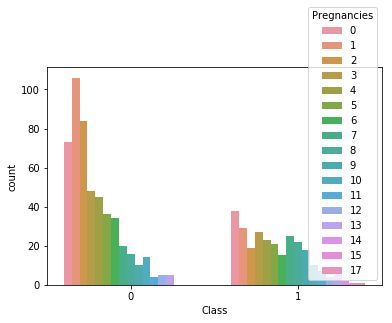

In [ ]:
sns.countplot(x="Class",hue="Pregnancies",data=data);

In [ ]:
[nd,men,std]=datacleanser(data);

Data before Cleansing:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            3      103             72             30      152  27.6   
1           12       88             74             40       54  35.3   
2            5      139             80             35      160  31.6   
3            1      108             60             46      178  35.5   
4            9      164             84             21        0  30.8   

   Diabetes Pedigree Function  Age  Class  
0                       0.730   27      0  
1                       0.378   48      0  
2                       0.361   25      1  
3                       0.415   24      0  
4                       0.831   32      1  
Data after Cleansing:

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.049544 -0.089745       0.023757       0.095782  0.085220 -0.065432   
1     0.479868 -0.165122       0.040150       0.196792 -0.030619  0.049322   
2     0.068103  0.0911

<b>Seperating Training, Cross Validation and Test sets.</b>

In [ ]:
[m,n]=nd.shape;
trnd=nd.iloc[0:int(0.8*m),:];
tstnd=nd.iloc[int(0.8*m):,:]
X_train=trnd.iloc[:,:-1];
Y_train=trnd["Class"].to_frame();
X_test=tstnd.iloc[:,:-1];
Y_test=tstnd["Class"].to_frame();

<b>Fitting and Testing:</b> 

The minimum value of cost: 0.4732763728955776
Best Threshold value: 0.25
Precision attained: 88.70967741935483 %
Recall attained: 59.13978494623656 %
Maximum percentage of Accuracy that can be achieved is: 75.32467532467533 %


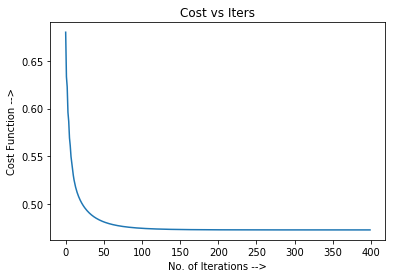

In [ ]:
theta=fit(X_train,Y_train);
threshold=thresholdfinder(X_train,theta,Y_train);
y= predict(X_test,theta,threshold);
[f1score,prec,rec] = f1scorefinder(Y_test,y);
print("Precision attained:",prec*100,"%");
print("Recall attained:",rec*100,"%");
y=predict(X_test,theta,0.5);
print("Maximum percentage of Accuracy that can be achieved is:",(y==Y_test)["Class"].mean()*100,"%");
X_test=X_test.drop(columns="ones");

<b>Testing for a specfic data</b>

In [ ]:
dnww=list(map(float, input("Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age").split()))
dn = (dnww-men[:7])/(std[:7]);
a=pd.Series([1]);
dn=a.append(dn);
dn=sum(sum(theta.T.values*dn.T.values));
print("Test Result of Diabetics test:",sigmoid(dn)>=threshold);
#Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age